# **Lung Cancer Prediction Using 10 models**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


**Note: In this dataset, YES=2 & NO=1**

In [3]:
df.shape

(309, 16)

In [4]:
#Checking for Duplicates
df.duplicated().sum()

33

In [5]:
#Removing Duplicates
df=df.drop_duplicates()

In [6]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [8]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn.
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.**

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [10]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


**Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


##### ***That is, Target Distribution is imbalanced.***

In [13]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

**Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..**

In [14]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='AGE'>

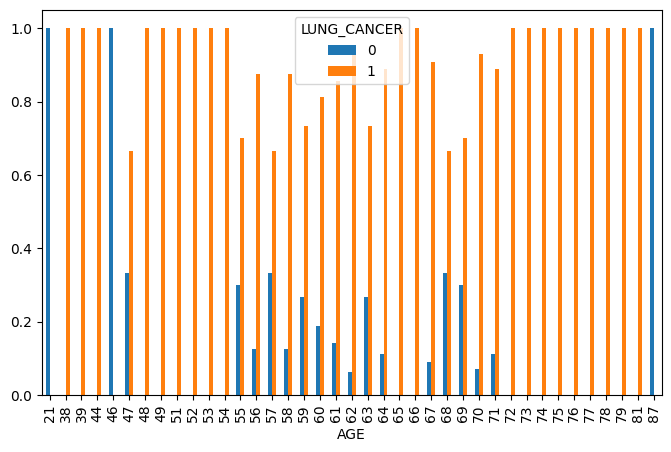

In [16]:
plot('AGE')

In [30]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


**CORRELATION**

In [31]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


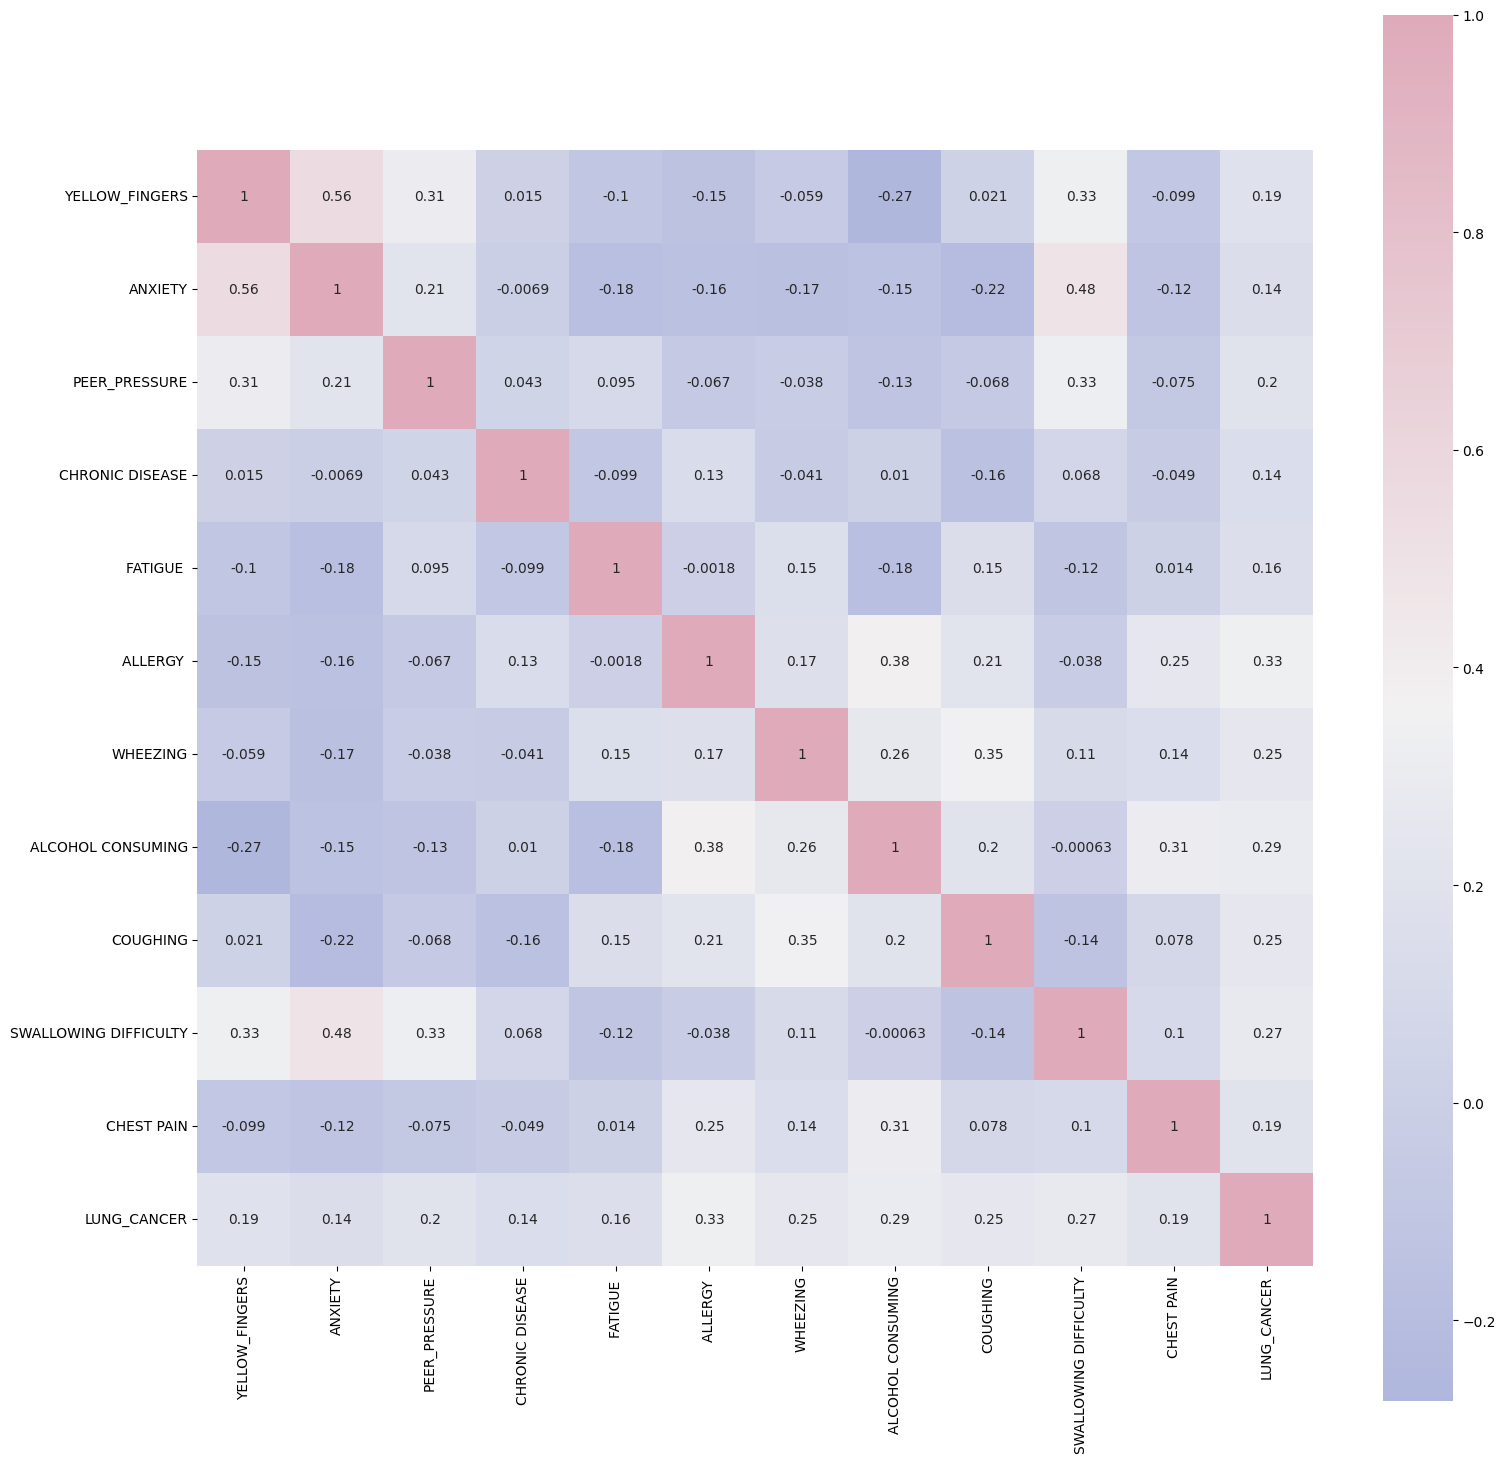

In [32]:
#Correlation 
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

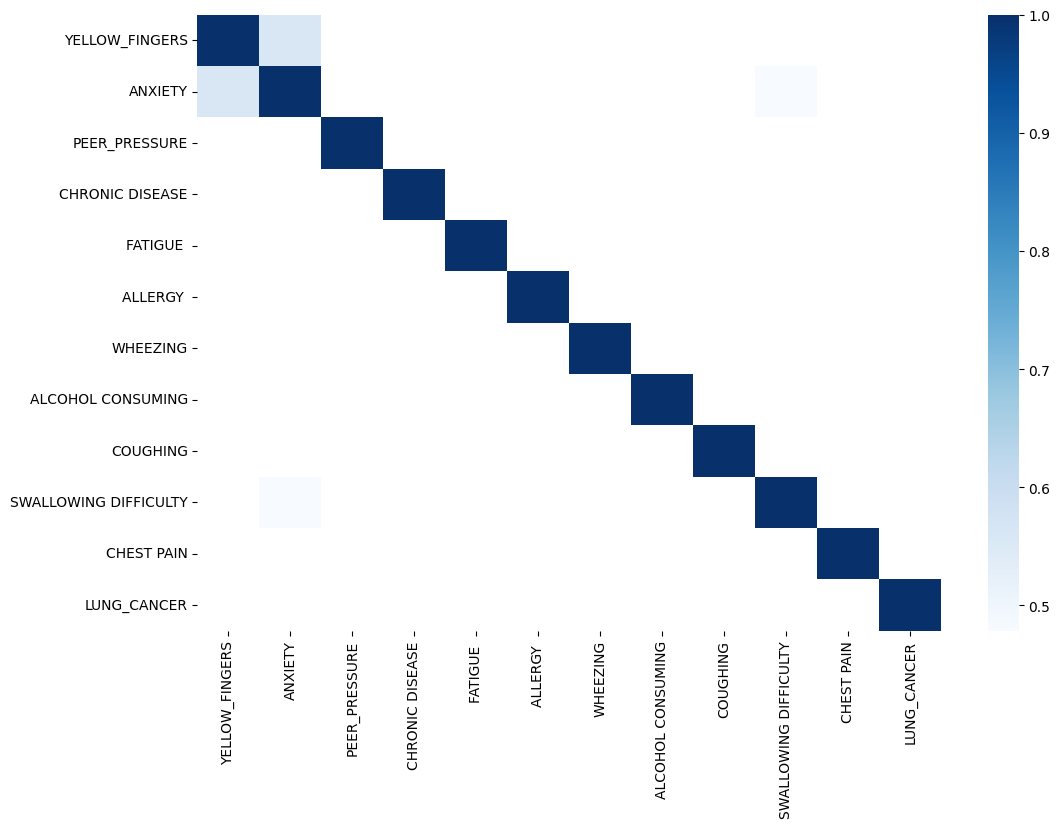

In [33]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# ***Feature Engineering***

Feature Engineering is the process of creating new features using existing features.

***The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%. So, lets create a new feature combining them.***

In [34]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [35]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

In [37]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
from packaging.version import parse as parse_version


In [42]:
pip install scikit-learn==0.24.2


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [62 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Mohan\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\pyproject_hooks\_i

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.5 MB ? eta -:--:--

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [62 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Mohan\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\pyproject_hooks\_i


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


# **Logistic Regression**

In [44]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [45]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [47]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



**This model is almost 97% accurate.**

# **Decision Tree**

In [48]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [50]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.97      0.93      0.95        60

    accuracy                           0.91        69
   macro avg       0.80      0.86      0.82        69
weighted avg       0.92      0.91      0.92        69



**This model is 94% accurate.**

# **K Nearest Neighbor**

In [51]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [53]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.97      0.93      0.95        60

    accuracy                           0.91        69
   macro avg       0.80      0.86      0.82        69
weighted avg       0.92      0.91      0.92        69



**This model is 96% accurate.**

# **Gaussian Naive Bayes**

In [54]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [55]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [56]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.98      0.92      0.95        60

    accuracy                           0.91        69
   macro avg       0.80      0.90      0.84        69
weighted avg       0.93      0.91      0.92        69



**This model is 92% accurate.**

# **Multinomial Naive Bayes**

In [57]:
#Fitting Multinomial Naive Bayes classifier to the training set  
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [58]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [59]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.87      1.00      0.93        60

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69



**This model is 81% accurate.**

# **Support Vector Classifier**

In [60]:
#Fitting SVC to the training set  
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [61]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [62]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



**This model is 98% accurate.**

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Random Forest**

In [63]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [65]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



**This model is also 98% accurate.**

# **XGBoost**

In [66]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



**This model is also 97% accurate.**

# **Multi-layer Perceptron classifier**

In [69]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [70]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [71]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.93      0.93      0.93        60

    accuracy                           0.88        69
   macro avg       0.74      0.74      0.74        69
weighted avg       0.88      0.88      0.88        69



**This model is also 98% accurate.**

# **Gradient Boosting**

In [72]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [74]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



**This model is also 98% accurate.**

From the above calculated accuracies, it is clear that the SVC, Random Forest, Multi-layer Perceptron and Gradient Boost models performed atmost level while the worst performed one is Multinomial Naive Bayes. 
However, I'm interested in a more efficient way of evaluating these models. Let's go for the Cross Validation methods using both K-Fold and Stratified K-Fold

# **Cross Validation**

In [75]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.9022486772486772
Decision tree models' average accuracy: 0.8773809523809524
KNN models' average accuracy: 0.898941798941799
Gaussian naive bayes models' average accuracy: 0.8986772486772487
Multinomial naive bayes models' average accuracy: 0.8624338624338626
Support Vector Classifier models' average accuracy: 0.8986772486772487
Random forest models' average accuracy: 0.8951058201058201
XGBoost models' average accuracy: 0.8882275132275131
Multi-layer perceptron models' average accuracy: 0.9166666666666666
Gradient boost models' average accuracy: 0.8989417989417989


In [76]:
import pickle
pickle.dump(rf_model, open('model.pkl', 'wb'))

In [80]:
pickle.dump(sc,open('sc.pkl','wb'))